**Leemos las imágenes del corpus olivetti**

In [1]:
from sklearn.datasets import fetch_olivetti_faces
orl = fetch_olivetti_faces()
X = orl.data

**Principal Component Analysis (PCA)**

In [2]:
import numpy as np
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]

**Proyectado y reconstrucción de imágenes tras PCA**

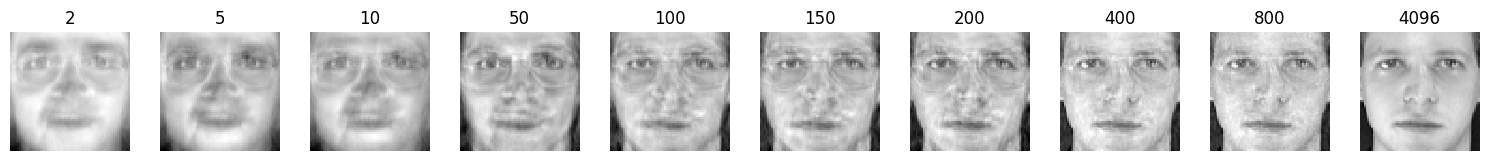

In [3]:
import matplotlib.pyplot as plt
nrows, ncols = 1, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15*nrows/ncols), constrained_layout=True)
K = [2, 5, 10, 50, 100, 150, 200, 400, 800, X.shape[1]]
c=0
for k in K:
    Xw = X @ U[:,0:k]
    Xr = Xw @ U.transpose()[0:k,:]
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(Xr[0,:].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("{:}".format(k))
    c=c+1